## Medical Transcription Prediction

### 1.Problem Identification/problem understanding

#### Here the problem/challenge is to classify the given medical transcription text into categories

### 2.Data collection


#### The dataset is taken from Kaggle 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting the plot style 
# plt.style.use('ggplot')
sns.set_style('darkgrid')

# To display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 3.Train Test Validation split

#### It's a very good practice to split the data into train, test and validation sets as soon as you get the data to avoid overfitting of the model and data leakage.

In [257]:
# Load the data

df = pd.read_csv('../Data/Medical Transcriptions/mtsamples.csv')

In [258]:
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [259]:
df.shape

(4999, 6)

In [260]:
df.drop(['Unnamed: 0','description','sample_name','keywords'],axis=1,inplace = True)

In [261]:
df

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
...,...,...
4994,Allergy / Immunology,"HISTORY:, I had the pleasure of meeting and e..."
4995,Allergy / Immunology,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH..."
4996,Allergy / Immunology,"SUBJECTIVE: , This is a 42-year-old white fema..."
4997,Allergy / Immunology,"CHIEF COMPLAINT: , This 5-year-old male presen..."


In [262]:
df['medical_specialty'] = df['medical_specialty'].apply(lambda x: x.strip())

In [263]:
df.medical_specialty.value_counts()

Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Urology                           158
Discharge Summary                 108
ENT - Otolaryngology               98
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    62
Psychiatry / Psychology            53
Office Notes                       51
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         27
Dentistry                          27
Letters     

min_samples = 200


df_surgery = df[df.medical_specialty=='Surgery'].sample(min_samples, random_state=2023)
df_Consult = df[df.medical_specialty=='Consult - History and Phy.'].sample(min_samples, random_state=2023)
df_Cardiovascular = df[df.medical_specialty=='Cardiovascular / Pulmonary'].sample(min_samples, random_state=2023)
df_Orthopedic = df[df.medical_specialty=='Orthopedic'].sample(min_samples, random_state=2023)
df_Radiology = df[df.medical_specialty=='Radiology'].sample(min_samples, random_state=2023)
df_General_Medicine = df[df.medical_specialty=='General Medicine'].sample(min_samples, random_state=2023)
df_Gastroenterology = df[df.medical_specialty=='Gastroenterology'].sample(min_samples, random_state=2023)
df_Neurology = df[df.medical_specialty=='Neurology'].sample(min_samples, random_state=2023)

final_df = pd.concat([df_surgery,df_Consult,df_Cardiovascular,df_Orthopedic,df_Radiology,df_General_Medicine,df_Gastroenterology,df_Neurology],axis=0)
final_df.medical_specialty.value_counts()

In [264]:
min_samples = 300


df_surgery = df[df.medical_specialty=='Surgery'].sample(min_samples, random_state=2023)
df_Consult = df[df.medical_specialty=='Consult - History and Phy.'].sample(min_samples, random_state=2023)
df_Cardiovascular = df[df.medical_specialty=='Cardiovascular / Pulmonary'].sample(min_samples, random_state=2023)
df_Orthopedic = df[df.medical_specialty=='Orthopedic'].sample(min_samples, random_state=2023)

In [265]:
final_df = pd.concat([df_surgery,df_Consult,df_Cardiovascular,df_Orthopedic],axis=0)
final_df.medical_specialty.value_counts()

Surgery                       300
Consult - History and Phy.    300
Cardiovascular / Pulmonary    300
Orthopedic                    300
Name: medical_specialty, dtype: int64

In [268]:
final_df

,medical_specialty,transcription
245,Surgery,"PREOPERATIVE DIAGNOSES,Airway obstruction seco..."
623,Surgery,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE..."
1074,Surgery,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ..."
737,Surgery,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ..."
724,Surgery,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles..."
...,...,...
2018,Orthopedic,"PREOPERATIVE DIAGNOSIS: ,1. Right cubital tu..."
2359,Orthopedic,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY..."
2137,Orthopedic,"CC: ,Low Back Pain (LBP) with associated BLE w..."
2275,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon..."


In [269]:
final_df.medical_specialty.unique()

array(['Surgery', 'Consult - History and Phy.',
       'Cardiovascular / Pulmonary', 'Orthopedic'], dtype=object)

In [270]:
Surgery_df = final_df[final_df['medical_specialty']=='Surgery']
Cardiovascular_df = final_df[final_df['medical_specialty']=='Cardiovascular / Pulmonary']
Consult_df = final_df[final_df['medical_specialty']=='Consult - History and Phy.']
Orthopedic_df = final_df[final_df['medical_specialty']=='Orthopedic']

In [271]:
Surgery_df

,medical_specialty,transcription
245,Surgery,"PREOPERATIVE DIAGNOSES,Airway obstruction seco..."
623,Surgery,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE..."
1074,Surgery,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ..."
737,Surgery,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ..."
724,Surgery,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles..."
...,...,...
755,Surgery,"INDICATION:, Coronary artery disease, severe ..."
1199,Surgery,"HISTORY: ,The patient is a 5-1/2-year-old wit..."
1002,Surgery,"PREOPERATIVE DIAGNOSIS: , Colon polyps.,POSTOP..."
308,Surgery,"PROCEDURES:,1. Placement of SynchroMed infusi..."


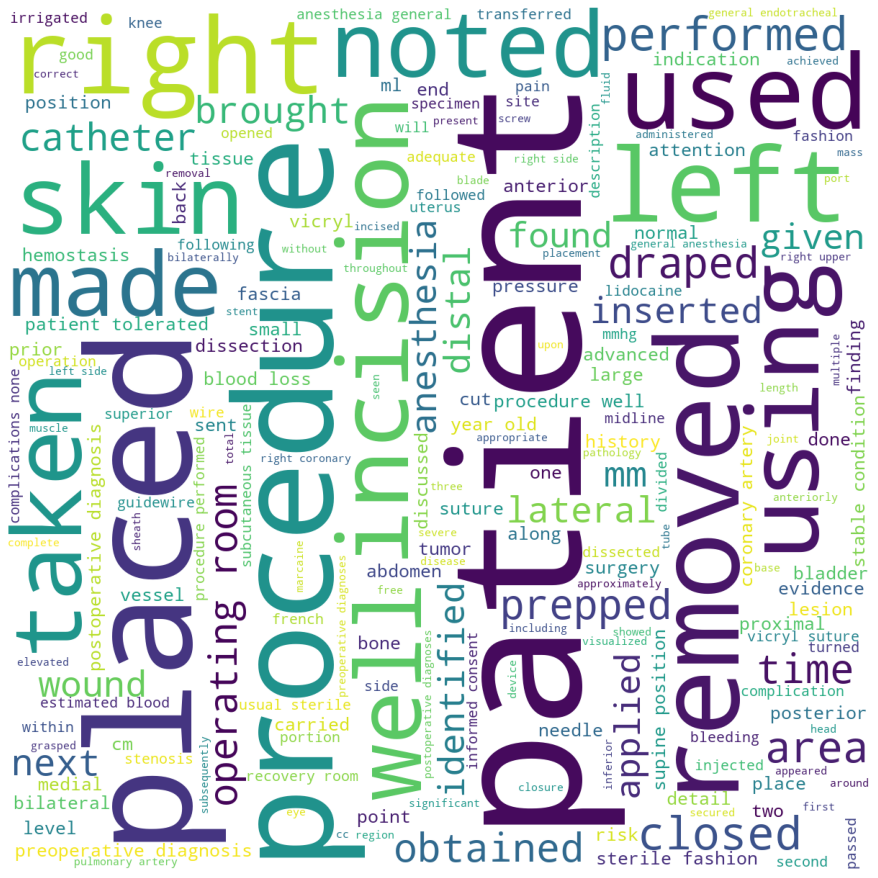

In [272]:
from wordcloud import WordCloud, STOPWORDS
import wordcloud
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in Surgery_df.transcription:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

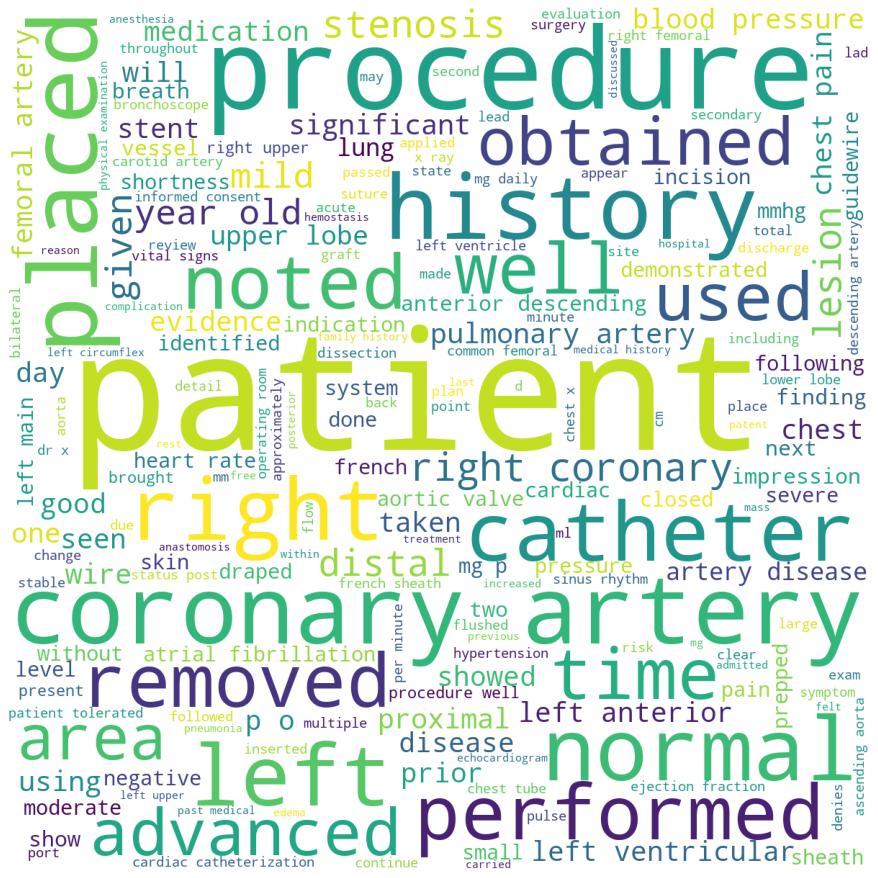

In [273]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in Cardiovascular_df.transcription:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

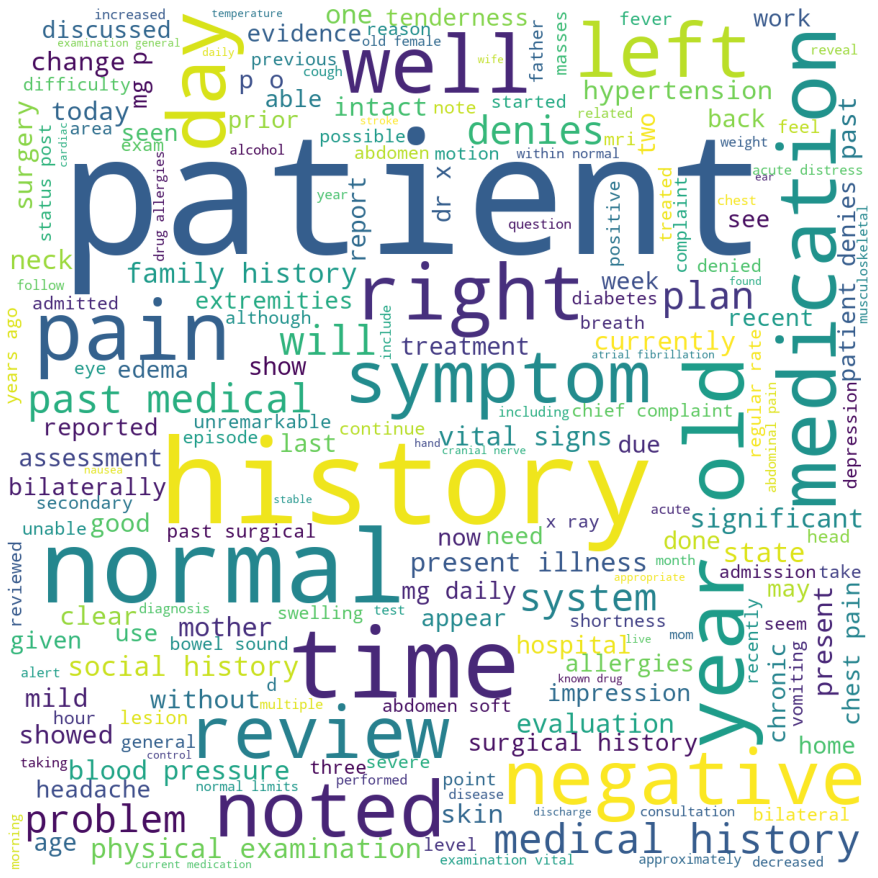

In [274]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in Consult_df.transcription:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

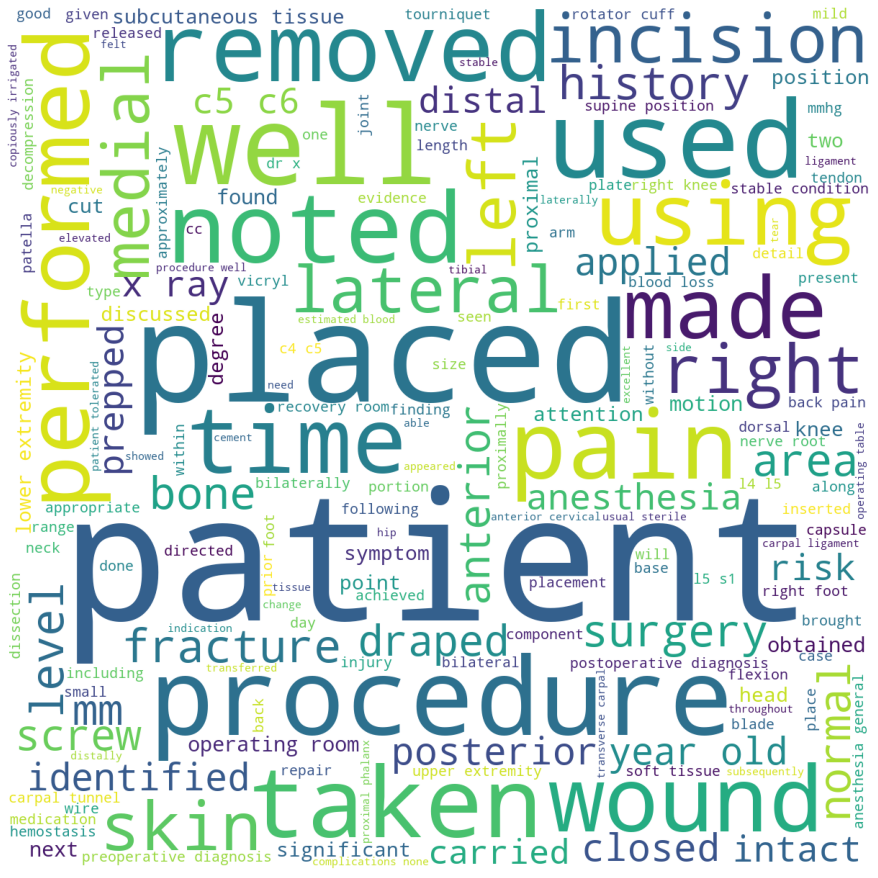

In [275]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in Orthopedic_df.transcription:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [276]:
final_df

,medical_specialty,transcription
245,Surgery,"PREOPERATIVE DIAGNOSES,Airway obstruction seco..."
623,Surgery,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE..."
1074,Surgery,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ..."
737,Surgery,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ..."
724,Surgery,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles..."
...,...,...
2018,Orthopedic,"PREOPERATIVE DIAGNOSIS: ,1. Right cubital tu..."
2359,Orthopedic,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY..."
2137,Orthopedic,"CC: ,Low Back Pain (LBP) with associated BLE w..."
2275,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon..."


In [277]:
from sklearn.preprocessing import LabelEncoder

In [278]:
label_encoder = LabelEncoder()

In [279]:
label_encoder.fit(final_df['medical_specialty'].values)

LabelEncoder()

In [280]:
label_encoder.classes_

array(['Cardiovascular / Pulmonary', 'Consult - History and Phy.',
       'Orthopedic', 'Surgery'], dtype=object)

In [281]:
final_df['target'] = label_encoder.transform(final_df['medical_specialty'])

In [282]:
final_df

,medical_specialty,transcription,target
245,Surgery,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
623,Surgery,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
1074,Surgery,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
737,Surgery,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
724,Surgery,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",3
...,...,...,...
2018,Orthopedic,"PREOPERATIVE DIAGNOSIS: ,1. Right cubital tu...",2
2359,Orthopedic,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
2137,Orthopedic,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
2275,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [283]:
final_df.drop('medical_specialty',axis=1,inplace = True)

In [284]:
final_df

,transcription,target
245,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
623,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
1074,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
737,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
724,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",3
...,...,...
2018,"PREOPERATIVE DIAGNOSIS: ,1. Right cubital tu...",2
2359,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
2137,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
2275,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [285]:
final_df.isna().sum()

transcription    3
target           0
dtype: int64

In [286]:
final_df.dropna(inplace=True)

In [287]:
final_df.shape

(1197, 2)

In [288]:
# splitting the data into train, test, val sets

test_df = final_df.sample(n=200,random_state=2023)
new_df = final_df.drop(test_df.index)
val_df = new_df.sample(n=200,random_state=2023)
train_df = new_df.drop(val_df.index)

In [289]:
# resetting the index of train and test datasets

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [290]:
train_df

,transcription,target
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
4,"PREOPERATIVE DIAGNOSIS AND INDICATIONS:, Acut...",3
...,...,...
792,"EXAM: , MRI of lumbar spine without contrast.,...",2
793,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
794,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
795,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [291]:
val_df

,transcription,target
0,"PROCEDURE: , Fiberoptic bronchoscopy.,PREOPERA...",0
1,"PREPROCEDURE DIAGNOSIS: , End-stage renal dise...",0
2,"PREOPERATIVE DIAGNOSES: , Epiretinal membrane,...",3
3,"PREOPERATIVE DIAGNOSIS: , Hemarthrosis, left k...",3
4,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",1
...,...,...
195,"PROCEDURE PERFORMED:, Right heart catheteriza...",0
196,"EXAM: , Left Heart Catheterization,REASON FOR ...",0
197,"PREOPERATIVE DIAGNOSIS:, Carcinoma of the lef...",3
198,"PREOPERATIVE DIAGNOSIS:, Medial meniscal tear...",2


In [292]:
test_df

,transcription,target
0,"PREOPERATIVE DIAGNOSIS: , Retained hardware, r...",3
1,"PROCEDURE: , Direct current cardioversion.,REA...",0
2,"PROCEDURE PERFORMED:, Lumbar puncture.,The pr...",2
3,"CHIEF COMPLAINT:, The patient comes for bladd...",1
4,"REASON FOR REFERRAL: ,The patient was referre...",1
...,...,...
195,"CHIEF COMPLAINT:, Right shoulder pain.,HISTOR...",2
196,"REASON FOR CONSULTATION: , Atrial fibrillation...",0
197,"REASON FOR CONSULT:, Evaluation of alcohol wi...",1
198,"PREOPERATIVE DIAGNOSIS: , Severely comminuted ...",3


### 4.Explore the data/try to get a sense of the data

In [293]:
# Prints the no.of rows, no.of colunmns, and each columns datatype and the no.of non-null values in each column

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transcription  797 non-null    object
 1   target         797 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 9.5+ KB


In [294]:
# prints the list of collumns, yes its not exactly a list but Index type

train_df.columns

Index(['transcription', 'target'], dtype='object')

In [295]:
train_df.isnull().sum()

# see no null values. less work

transcription    0
target           0
dtype: int64

In [296]:
# prints the no.of unique values in each column

train_df.nunique().sort_values(ascending=False)

transcription    743
target             4
dtype: int64

In [297]:
# prints the count of category frequency of the target column

train_df['target'].value_counts(normalize=True)

0    0.257215
1    0.254705
2    0.253450
3    0.234630
Name: target, dtype: float64

### Observations :

1. From above we can see that the data types are represented properly and also no null values 
2. Its big dataset 1600 ), we took 200 samples for test set and 200 samples for validaton set.
3. dataset is balanced.

In [298]:
final_df

,transcription,target
245,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
623,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
1074,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
737,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
724,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",3
...,...,...
2018,"PREOPERATIVE DIAGNOSIS: ,1. Right cubital tu...",2
2359,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
2137,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
2275,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [299]:
Surgery_df.transcription.iloc[0]

"PREOPERATIVE DIAGNOSES,Airway obstruction secondary to severe subglottic tracheal stenosis with foreign body in the trachea.,POSTOPERATIVE DIAGNOSES,Airway obstruction secondary to severe subglottic tracheal stenosis with foreign body in the trachea.,OPERATION PERFORMED,Neck exploration; tracheostomy; urgent flexible bronchoscopy via tracheostomy site; removal of foreign body, tracheal metallic stent material; dilation distal trachea; placement of #8 Shiley single cannula tracheostomy tube.,INDICATIONS FOR SURGERY,The patient is a 50-year-old white male with history of progressive tracheomalacia treated in the National Tennessee, and several years ago he had a tracheal metallic stent placed with some temporary improvement.  However developed progressive problems and he had two additional stents placed with some initial improvement.  Subsequently, he developed progressive airway obstruction and came into the ABC Hospital critical airway service for further evaluation and was admitted o

In [300]:
Cardiovascular_df.transcription.iloc[0]

'INDICATIONS:  ,Chest pain, hypertension, type II diabetes mellitus.,PROCEDURE DONE:,  Dobutamine Myoview stress test.,STRESS ECG RESULTS:,  The patient was stressed by dobutamine infusion at a rate of 10 mcg/kg/minute for three minutes, 20 mcg/kg/minute for three minutes, and 30 mcg/kg/minute for three additional minutes.  Atropine 0.25 mg was given intravenously eight minutes into the dobutamine infusion.  The resting electrocardiogram reveals a regular sinus rhythm with heart rate of 86 beats per minute, QS pattern in leads V1 and V2, and diffuse nonspecific T wave abnormality.  The heart rate increased from 86 beats per minute to 155 beats per minute, which is about 90% of the maximum predicted target heart rate.  The blood pressure increased from 130/80 to 160/70.  A maximum of 1 mm J-junctional depression was seen with fast up sloping ST segments during dobutamine infusion.  No ischemic ST segment changes were seen during dobutamine infusion or during the recovery process.,MYOCAR

In [301]:
Gastroenterology_df.transcription.iloc[0]

'PROCEDURE:,  Upper endoscopy with removal of food impaction.,HISTORY OF PRESENT ILLNESS: , A 92-year-old lady with history of dysphagia on and off for two years.  She comes in this morning with complaints of inability to swallow anything including her saliva.  This started almost a day earlier.  She was eating lunch and had beef stew and suddenly noticed inability to finish her meal and since then has not been able to eat anything.  She is on Coumadin and her INR is 2.5.,OPERATIVE NOTE: , Informed consent was obtained from patient.  The risks of aspiration, bleeding, perforation, infection, and serious risk including need for surgery and ICU stay particularly in view of food impaction for almost a day was discussed.  Daughter was also informed about the procedure and risks.  Conscious sedation initially was administered with Versed 2 mg and fentanyl 50 mcg.  The scope was advanced into the esophagus and showed liquid and solid particles from mid esophagus all the way to the distal eso

In [302]:
Neurology_df.transcription.iloc[0]

'CC:, Difficulty with word finding.,HX: ,This 27y/o RHF experienced sudden onset word finding difficulty and slurred speech on the evening of 2/19/96. She denied any associated dysphagia, diplopia, numbness or weakness of her extremities. She went to sleep with her symptoms on 2/19/96, and awoke with them on 2/20/96. She also awoke with a headache (HA) and mild neck stiffness. She took a shower and her HA and neck stiffness resolved. Throughout the day she continued to have difficulty with word finding and had worsening of her slurred speech. That evening, she began to experience numbness and weakness in the lower right face. She felt like there was a "rubber-band" wrapped around her tongue.,For 3 weeks prior to presentation, she experienced transient episodes of a "boomerang" shaped field cut in the left eye. The episodes were not associated with any other symptoms. One week prior to presentation, she went to a local ER for menorrhagia. She had just resumed taking oral birth control p

In [303]:
train_df

,transcription,target
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
4,"PREOPERATIVE DIAGNOSIS AND INDICATIONS:, Acut...",3
...,...,...
792,"EXAM: , MRI of lumbar spine without contrast.,...",2
793,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
794,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
795,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [304]:
train_df['target'].value_counts()

0    205
1    203
2    202
3    187
Name: target, dtype: int64

In [342]:
train_df

,transcription,target
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
4,"PREOPERATIVE DIAGNOSIS AND INDICATIONS:, Acut...",3
...,...,...
792,"EXAM: , MRI of lumbar spine without contrast.,...",2
793,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
794,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
795,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [306]:
X_train = train_df['transcription']
y_train = train_df['target']

X_train = train_df_sample['Plot']
y_train = train_df_sample['target']

In [307]:
X_val = val_df['transcription']
y_val = val_df['target']

In [308]:
X_test = test_df['transcription']
y_test = test_df['target']

In [309]:
print('train :' ,X_train.shape, y_train.shape)
print('val :' ,X_val.shape, y_val.shape)
print('test :' ,X_test.shape, y_test.shape)

train : (797,) (797,)
val : (200,) (200,)
test : (200,) (200,)


In [310]:
X_train

0      PREOPERATIVE DIAGNOSES,Airway obstruction seco...
1      PREOPERATIVE DIAGNOSIS:,  Pelvic pain.,POSTOPE...
2      PREOPERATIVE DIAGNOSIS:,  Right carpal tunnel ...
3      PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...
4      PREOPERATIVE DIAGNOSIS AND INDICATIONS:,  Acut...
                             ...                        
792    EXAM: , MRI of lumbar spine without contrast.,...
793    CHIEF COMPLAINT:,  Right ankle sprain.,HISTORY...
794    CC: ,Low Back Pain (LBP) with associated BLE w...
795    PREOPERATIVE DIAGNOSIS: , Left distal both-bon...
796    CC:, Left hemibody numbness.,HX:, This 44y/o R...
Name: transcription, Length: 797, dtype: object

### Create bag of words representation using CountVectorizer

In [311]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<797x14313 sparse matrix of type '<class 'numpy.float64'>'
	with 186185 stored elements in Compressed Sparse Row format>

In [312]:
X_val_cv = v.transform(X_val)
X_test_cv = v.transform(X_test)

In [313]:
v.get_feature_names_out()

array(['00', '000', '000units', ..., 'zyprexa', 'zyrtec', 'zyvox'],
      dtype=object)

In [314]:
v.vocabulary_

{'preoperative': 10025,
 'diagnoses': 3901,
 'airway': 1027,
 'obstruction': 8863,
 'secondary': 11430,
 'to': 13076,
 'severe': 11562,
 'subglottic': 12336,
 'tracheal': 13180,
 'stenosis': 12149,
 'with': 14138,
 'foreign': 5454,
 'body': 2060,
 'in': 6569,
 'the': 12894,
 'trachea': 13179,
 'postoperative': 9916,
 'operation': 8975,
 'performed': 9500,
 'neck': 8526,
 'exploration': 4984,
 'tracheostomy': 13186,
 'urgent': 13637,
 'flexible': 5344,
 'bronchoscopy': 2195,
 'via': 13851,
 'site': 11738,
 'removal': 10857,
 'of': 8907,
 'metallic': 8051,
 'stent': 12153,
 'material': 7877,
 'dilation': 3973,
 'distal': 4106,
 'placement': 9708,
 'shiley': 11622,
 'single': 11721,
 'cannula': 2382,
 'tube': 13392,
 'indications': 6645,
 'for': 5440,
 'surgery': 12519,
 'patient': 9393,
 'is': 7043,
 '50': 475,
 'year': 14254,
 'old': 8925,
 'white': 14097,
 'male': 7785,
 'history': 6201,
 'progressive': 10165,
 'tracheomalacia': 13184,
 'treated': 13290,
 'national': 8495,
 'tennessee'

In [315]:
X_train_cv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [341]:
X_train_cv.shape

(797, 14313)

In [316]:
X_train_cv.toarray().shape

(797, 14313)

In [317]:
X_train[0]

"PREOPERATIVE DIAGNOSES,Airway obstruction secondary to severe subglottic tracheal stenosis with foreign body in the trachea.,POSTOPERATIVE DIAGNOSES,Airway obstruction secondary to severe subglottic tracheal stenosis with foreign body in the trachea.,OPERATION PERFORMED,Neck exploration; tracheostomy; urgent flexible bronchoscopy via tracheostomy site; removal of foreign body, tracheal metallic stent material; dilation distal trachea; placement of #8 Shiley single cannula tracheostomy tube.,INDICATIONS FOR SURGERY,The patient is a 50-year-old white male with history of progressive tracheomalacia treated in the National Tennessee, and several years ago he had a tracheal metallic stent placed with some temporary improvement.  However developed progressive problems and he had two additional stents placed with some initial improvement.  Subsequently, he developed progressive airway obstruction and came into the ABC Hospital critical airway service for further evaluation and was admitted o

In [318]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [319]:
np.where(X_train_np[0]!=0)

(array([   32,   132,   475,   694,   722,   731,   860,   883,   906,
          916,   973,   999,  1027,  1060,  1090,  1094,  1153,  1183,
         1186,  1189,  1258,  1362,  1403,  1426,  1445,  1502,  1572,
         1610,  1617,  1734,  1825,  1884,  1908,  2012,  2039,  2060,
         2184,  2195,  2283,  2292,  2328,  2361,  2382,  2404,  2431,
         2455,  2456,  2473,  2480,  2629,  2672,  2808,  2858,  2943,
         3042,  3043,  3085,  3109,  3185,  3195,  3443,  3451,  3620,
         3638,  3706,  3766,  3835,  3877,  3901,  3973,  4048,  4099,
         4106,  4107,  4133,  4150,  4230,  4241,  4252,  4385,  4400,
         4535,  4561,  4614,  4625,  4652,  4678,  4696,  4754,  4857,
         4898,  4923,  4984,  4986,  4989,  5011,  5020,  5054,  5083,
         5115,  5123,  5182,  5214,  5276,  5324,  5344,  5425,  5440,
         5454,  5487,  5491,  5502,  5535,  5575,  5580,  5677,  5738,
         5800,  5836,  5936,  6007,  6019,  6188,  6201,  6270,  6275,
      

In [320]:
X_train_np[0][np.where(X_train_np[0]!=0)]

array([0.02618272, 0.01701491, 0.0144012 , 0.02097106, 0.01481075,
       0.02355923, 0.01701491, 0.01481075, 0.01574362, 0.0150732 ,
       0.01745554, 0.01476829, 0.18269448, 0.01835068, 0.00957309,
       0.02935013, 0.01485494, 0.19961797, 0.01952061, 0.01589947,
       0.0115491 , 0.01559238, 0.01209571, 0.02223411, 0.01574362,
       0.0364909 , 0.04468339, 0.02326345, 0.02069442, 0.01069954,
       0.03019915, 0.02618272, 0.01606022, 0.01384246, 0.01871035,
       0.0708677 , 0.02935013, 0.06913705, 0.00976031, 0.01672876,
       0.02580354, 0.01889643, 0.0422304 , 0.01971685, 0.01444071,
       0.01182699, 0.02397856, 0.02996842, 0.07635158, 0.02804403,
       0.01099425, 0.02752515, 0.02384616, 0.02752515, 0.02451765,
       0.01122169, 0.01062374, 0.03315035, 0.03576009, 0.02451765,
       0.09664048, 0.02618272, 0.03013887, 0.02326345, 0.03576009,
       0.05612849, 0.01539744, 0.03069968, 0.02713535, 0.05236545,
       0.01282212, 0.02768493, 0.07781244, 0.01818957, 0.03368

In [321]:
v.get_feature_names_out()[np.where(X_train_np[0]!=0)]

array(['1000', '16', '50', 'abc', 'able', 'above', 'additional',
       'adequate', 'administered', 'admitted', 'after', 'ago', 'airway',
       'all', 'also', 'alteration', 'an', 'and', 'anesthesia',
       'anesthetic', 'anterior', 'appeared', 'approximately', 'area',
       'around', 'as', 'at', 'attachment', 'attempt', 'back', 'be',
       'beneath', 'between', 'bleeding', 'blunt', 'body', 'bronchi',
       'bronchoscopy', 'but', 'by', 'calcification', 'came', 'cannula',
       'capsule', 'cardiac', 'care', 'careful', 'carried', 'cartilage',
       'changes', 'chest', 'clavicle', 'closed', 'collar', 'complication',
       'complications', 'condition', 'confirmed', 'constricting',
       'consulted', 'cricoid', 'critical', 'dd', 'debridement',
       'definable', 'dense', 'description', 'developed', 'diagnoses',
       'dilation', 'discussed', 'dissection', 'distal', 'distally',
       'disturbed', 'divided', 'down', 'dr', 'draped', 'each', 'easily',
       'elevated', 'embedded', '

In [322]:
# Preprocessing imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,IsolationForest,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier

# Cross-validation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor

# Metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,precision_recall_curve

from imblearn.over_sampling import SMOTE

# Visualize Pipeline
from sklearn import set_config

# to save the model
import joblib

In [323]:
# As we have computer resource limitations we only gonna try few models

models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['MultinomialNB',MultinomialNB()],
         ['DecisionTreeClassifier', DecisionTreeClassifier()],
         ['RandomForestClassifier', RandomForestClassifier()]]

In [324]:
results = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, X_train_cv.toarray(), y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(X_train_cv.toarray(),y_train)
    y_train_pred = model.predict(X_train_cv.toarray())
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(X_val_cv)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results = results.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       205
           1       0.84      0.96      0.90       203
           2       0.85      0.89      0.87       202
           3       0.89      0.74      0.81       187

    accuracy                           0.86       797
   macro avg       0.87      0.86      0.86       797
weighted avg       0.87      0.86      0.86       797

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        55
           1       0.70      0.93      0.80        46
           2       0.81      0.69      0.74        51
           3       0.58      0.71      0.64        48

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.72      0.70      0.69       200

train_score :  0.863237139272271
val_score :  0.7
RidgeClassifier
              precision    recall  f1-score  

In [325]:
results.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.717544,0.863237,0.865823,0.860815,0.860462,0.700000
1,RidgeClassifier,0.738867,0.917189,0.920429,0.915133,0.915726,0.700000
2,SGDClassifier,0.731533,0.932246,0.939035,0.929981,0.930978,0.730000
3,MultinomialNB,0.711360,0.791719,0.816696,0.789493,0.787325,0.705000
4,DecisionTreeClassifier,0.539525,0.932246,0.937969,0.929755,0.930594,0.540000
5,RandomForestClassifier,0.661921,0.932246,0.931925,0.931172,0.931353,0.650000


In [326]:
results.sort_values(by=['Val_Accuracy'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
2,SGDClassifier,0.731533,0.932246,0.939035,0.929981,0.930978,0.73
3,MultinomialNB,0.71136,0.791719,0.816696,0.789493,0.787325,0.705
0,LogisticRegression,0.717544,0.863237,0.865823,0.860815,0.860462,0.7
1,RidgeClassifier,0.738867,0.917189,0.920429,0.915133,0.915726,0.7
5,RandomForestClassifier,0.661921,0.932246,0.931925,0.931172,0.931353,0.65
4,DecisionTreeClassifier,0.539525,0.932246,0.937969,0.929755,0.930594,0.54


In [327]:
results.sort_values(by=['cv_results'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
1,RidgeClassifier,0.738867,0.917189,0.920429,0.915133,0.915726,0.7
2,SGDClassifier,0.731533,0.932246,0.939035,0.929981,0.930978,0.73
0,LogisticRegression,0.717544,0.863237,0.865823,0.860815,0.860462,0.7
3,MultinomialNB,0.71136,0.791719,0.816696,0.789493,0.787325,0.705
5,RandomForestClassifier,0.661921,0.932246,0.931925,0.931172,0.931353,0.65
4,DecisionTreeClassifier,0.539525,0.932246,0.937969,0.929755,0.930594,0.54


In [328]:
# writing results to a file

results.to_csv('results.csv',index=False)

In [343]:
train_df

,transcription,target
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",3
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",3
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",3
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",3
4,"PREOPERATIVE DIAGNOSIS AND INDICATIONS:, Acut...",3
...,...,...
792,"EXAM: , MRI of lumbar spine without contrast.,...",2
793,"CHIEF COMPLAINT:, Right ankle sprain.,HISTORY...",2
794,"CC: ,Low Back Pain (LBP) with associated BLE w...",2
795,"PREOPERATIVE DIAGNOSIS: , Left distal both-bon...",2


In [344]:
X_train = train_df['transcription']
y_train = train_df['target']

X_train = train_df_sample['Plot']
y_train = train_df_sample['target']

In [345]:
X_val = val_df['transcription']
y_val = val_df['target']

In [346]:
X_test = test_df['transcription']
y_test = test_df['target']

## TfidfVectorizer

In [347]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<797x14313 sparse matrix of type '<class 'numpy.float64'>'
	with 186185 stored elements in Compressed Sparse Row format>

In [348]:
X_val_cv = v.transform(X_val)
X_test_cv = v.transform(X_test)

In [355]:
X_train_cv.toarray().shape

(797, 14313)

In [358]:
X_train_cv.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [359]:
smote = SMOTE(sampling_strategy='minority',random_state=5,n_jobs=-1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_cv, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [349]:
# As we have computer resource limitations we only gonna try few models

models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['MultinomialNB',MultinomialNB()],
         ['RandomForestClassifier', RandomForestClassifier()]]

In [350]:
results2 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, X_train_cv.toarray(), y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(X_train_cv.toarray(),y_train)
    y_train_pred = model.predict(X_train_cv.toarray())
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(X_val_cv)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results2 = results2.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       205
           1       0.84      0.96      0.90       203
           2       0.85      0.89      0.87       202
           3       0.89      0.74      0.81       187

    accuracy                           0.86       797
   macro avg       0.87      0.86      0.86       797
weighted avg       0.87      0.86      0.86       797

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        55
           1       0.70      0.93      0.80        46
           2       0.81      0.69      0.74        51
           3       0.58      0.71      0.64        48

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.72      0.70      0.69       200

train_score :  0.863237139272271
val_score :  0.7
RidgeClassifier
              precision    recall  f1-score  

In [351]:
results2.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.717544,0.863237,0.865823,0.860815,0.860462,0.700000
1,RidgeClassifier,0.738867,0.917189,0.920429,0.915133,0.915726,0.700000
2,SGDClassifier,0.725490,0.932246,0.934970,0.930775,0.931452,0.690000
3,MultinomialNB,0.711360,0.791719,0.816696,0.789493,0.787325,0.705000
4,RandomForestClassifier,0.663718,0.932246,0.933884,0.930600,0.931139,0.615000


In [352]:
results2.sort_values(by=['cv_results'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
1,RidgeClassifier,0.738867,0.917189,0.920429,0.915133,0.915726,0.7
2,SGDClassifier,0.72549,0.932246,0.93497,0.930775,0.931452,0.69
0,LogisticRegression,0.717544,0.863237,0.865823,0.860815,0.860462,0.7
3,MultinomialNB,0.71136,0.791719,0.816696,0.789493,0.787325,0.705
4,RandomForestClassifier,0.663718,0.932246,0.933884,0.9306,0.931139,0.615


In [353]:
results2.sort_values(by=['Val_Accuracy'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
3,MultinomialNB,0.71136,0.791719,0.816696,0.789493,0.787325,0.705
0,LogisticRegression,0.717544,0.863237,0.865823,0.860815,0.860462,0.7
1,RidgeClassifier,0.738867,0.917189,0.920429,0.915133,0.915726,0.7
2,SGDClassifier,0.72549,0.932246,0.93497,0.930775,0.931452,0.69
4,RandomForestClassifier,0.663718,0.932246,0.933884,0.9306,0.931139,0.615


In [354]:
# writing results to a file

results2.to_csv('results2.csv',index=False)

### Use text pre-processing to remove stop words, punctuations and apply lemmatization

You may wonder, we have not done any text-processing yet to remove stop words, punctuations, apply lemmatization etc. Well we wanted to train the model without any preprocessing first and check the performance. Now we will re-do same thing but with preprocessing of text

In [ ]:
import spacy

In [ ]:
import re

In [95]:
nlp = spacy.load("en_core_web_sm") 

# load english language model and create nlp object from it
def preprocess(text):
    
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    text = text.replace('\r', '').replace('\n', '')
    text = text.strip().lower()
    
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [96]:
train_df

,transcription,target
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7
...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4


In [97]:
train_df['preprocessed_txt'] = train_df['transcription'].apply(preprocess)

#train_df_sample['preprocessed_txt'] = train_df_sample['Plot'].apply(preprocess)
val_df['preprocessed_txt'] = val_df['transcription'].apply(preprocess)
test_df['preprocessed_txt'] = test_df['transcription'].apply(preprocess)

In [133]:
train_df

,transcription,target,preprocessed_txt
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7,preoperative diagnose airway obstruction secon...
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7,preoperative diagnosis pelvic pain postoperati...
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7,preoperative diagnosis right carpal tunnel syn...
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7,preoperative diagnosis right temporal lobe int...
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7,preoperative diagnosis bilateral hydrocele pos...
...,...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4,cc fall hx 51y o rhf fall time 1 3 93 leg sudd...
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4,history present illness patient 55 year old ge...
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4,reason visit patient 38 year old woman pseudot...
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4,exam lumbar spine ct contrast history pain fal...


train_df_sample

In [134]:
val_df

,transcription,target,preprocessed_txt
0,"CHIEF COMPLAINT: , ""I have had trouble breathi...",3,chief complaint trouble breathe past 3 day his...
1,"HISTORY OF PRESENT ILLNESS: , This is a ** wee...",1,history present illness week gestational age d...
2,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi...",7,procedure bilateral l5 s1 s2 s3 radiofrequency...
3,"HPI - WORKERS COMP:, The current problem began...",5,hpi worker comp current problem begin 2 10 200...
4,"SUBJECTIVE:, This is a followup dietary consu...",1,subjective followup dietary consultation polyc...
...,...,...,...
195,"PREOPERATIVE DIAGNOSIS: , Tailor's bunion, rig...",7,preoperative diagnosis tailor bunion right foo...
196,"HISTORY OF PRESENT ILLNESS: , Hospitalist foll...",0,history present illness hospitalist followup r...
197,"PREOPERATIVE DIAGNOSIS: ,Open angle glaucoma O...",7,preoperative diagnosis open angle glaucoma ox ...
198,"REASON FOR EXAMINATION:, Abnormal EKG.,FINDIN...",0,reason examination abnormal ekg finding patien...


In [135]:
test_df

,transcription,target,preprocessed_txt
0,"REASON FOR VISIT:, The patient is an 11-month...",1,reason visit patient 11 month old diagnosis st...
1,"CC:, Transient visual field loss.,HX: ,This 58...",6,cc transient visual field loss hx 58 y o rhf 2...
2,"CHIEF COMPLAINT:, Neck and lower back pain.,VE...",5,chief complaint neck low pain vehicular trauma...
3,"EXAM:, Nuclear medicine lymphatic scan.,REASO...",6,exam nuclear medicine lymphatic scan reason ex...
4,"HISTORY OF PRESENT ILLNESS: , This is a 91-yea...",3,history present illness 91 year old male previ...
...,...,...,...
195,"PREOPERATIVE DIAGNOSIS:, Positive peptic ulce...",2,preoperative diagnosis positive peptic ulcer d...
196,"HISTORY:, A 69-year-old female with past hist...",1,history 69 year old female past history type i...
197,"EXAM:, CT cervical spine (C-spine) for trauma...",6,exam ct cervical spine c spine trauma finding ...
198,"INDICATION: , Rectal bleeding.,PREMEDICATION:...",2,indication rectal bleeding premedication proce...


In [136]:
X_train = train_df['preprocessed_txt']
y_train = train_df['target']

X_train = train_df_sample['preprocessed_txt']
y_train = train_df_sample['target']

In [137]:
X_val = val_df['preprocessed_txt']
y_val = val_df['target']

In [138]:
X_test = test_df['preprocessed_txt']
y_test = test_df['target']

## TfidfVectorizer

In [139]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<1192x13238 sparse matrix of type '<class 'numpy.float64'>'
	with 199516 stored elements in Compressed Sparse Row format>

In [140]:
X_val_cv = v.transform(X_val)
X_test_cv = v.transform(X_test)

In [141]:
# As we have computer resource limitations we only gonna try few models

models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['MultinomialNB',MultinomialNB()],
         ['RandomForestClassifier', RandomForestClassifier()]]

In [142]:
results3 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, X_train_cv.toarray(), y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(X_train_cv.toarray(),y_train)
    y_train_pred = model.predict(X_train_cv.toarray())
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(X_val_cv)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results3 = results3.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       153
           1       0.75      0.77      0.76       153
           2       0.87      0.85      0.86       145
           3       0.80      0.90      0.85       146
           4       0.70      0.79      0.75       155
           5       0.86      0.88      0.87       142
           6       0.75      0.66      0.70       153
           7       0.88      0.69      0.77       145

    accuracy                           0.80      1192
   macro avg       0.80      0.80      0.80      1192
weighted avg       0.80      0.80      0.79      1192

              precision    recall  f1-score   support

           0       0.43      0.45      0.44        22
           1       0.39      0.44      0.41        27
           2       0.80      0.70      0.74        23
           3       0.57      0.61      0.59        28
           4       0.43      0.41      0.42        22
     

In [143]:
results3.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.516758,0.795302,0.799968,0.796347,0.795623,0.525000
1,RidgeClassifier,0.497243,0.843960,0.850310,0.844965,0.843483,0.500000
2,SGDClassifier,0.457311,0.852349,0.859278,0.853135,0.853614,0.480000
3,MultinomialNB,0.526219,0.705537,0.717521,0.706753,0.703393,0.530000
4,RandomForestClassifier,0.443925,0.853188,0.856610,0.854174,0.854487,0.435000


In [144]:
results3.sort_values(by=['cv_results'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
3,MultinomialNB,0.526219,0.705537,0.717521,0.706753,0.703393,0.53
0,LogisticRegression,0.516758,0.795302,0.799968,0.796347,0.795623,0.525
1,RidgeClassifier,0.497243,0.84396,0.85031,0.844965,0.843483,0.5
2,SGDClassifier,0.457311,0.852349,0.859278,0.853135,0.853614,0.48
4,RandomForestClassifier,0.443925,0.853188,0.85661,0.854174,0.854487,0.435


In [145]:
results3.sort_values(by=['Val_Accuracy'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
3,MultinomialNB,0.526219,0.705537,0.717521,0.706753,0.703393,0.53
0,LogisticRegression,0.516758,0.795302,0.799968,0.796347,0.795623,0.525
1,RidgeClassifier,0.497243,0.84396,0.85031,0.844965,0.843483,0.5
2,SGDClassifier,0.457311,0.852349,0.859278,0.853135,0.853614,0.48
4,RandomForestClassifier,0.443925,0.853188,0.85661,0.854174,0.854487,0.435


In [146]:
# writing results to a file

results3.to_csv('results3.csv',index=False)

train_df_sample

In [147]:
train_df

,transcription,target,preprocessed_txt
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7,preoperative diagnose airway obstruction secon...
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7,preoperative diagnosis pelvic pain postoperati...
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7,preoperative diagnosis right carpal tunnel syn...
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7,preoperative diagnosis right temporal lobe int...
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7,preoperative diagnosis bilateral hydrocele pos...
...,...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4,cc fall hx 51y o rhf fall time 1 3 93 leg sudd...
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4,history present illness patient 55 year old ge...
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4,reason visit patient 38 year old woman pseudot...
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4,exam lumbar spine ct contrast history pain fal...


In [148]:
nlp = spacy.load("en_core_web_lg")

#This will take some time(nearly 15 minutes)
train_df_sample['vector'] = train_df_sample['preprocessed_txt'].apply(lambda text: nlp(text).vector)

In [149]:
#This will take some time(nearly 15 minutes)
train_df['vector'] = train_df['preprocessed_txt'].apply(lambda text: nlp(text).vector)

In [150]:
val_df['vector'] = val_df['preprocessed_txt'].apply(lambda text: nlp(text).vector)
test_df['vector'] = test_df['preprocessed_txt'].apply(lambda text: nlp(text).vector)

train_df_sample

In [151]:
train_df

,transcription,target,preprocessed_txt,vector
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7,preoperative diagnose airway obstruction secon...,"[-0.30812818, 0.38351813, -1.0802138, 1.028389..."
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7,preoperative diagnosis pelvic pain postoperati...,"[-0.099564314, 0.34306082, -1.3467921, 1.44254..."
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7,preoperative diagnosis right carpal tunnel syn...,"[0.015296761, 0.80050725, -1.408335, 1.0462542..."
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7,preoperative diagnosis right temporal lobe int...,"[-0.15936296, 0.65788937, -1.4604679, 1.099661..."
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7,preoperative diagnosis bilateral hydrocele pos...,"[-0.1107318, 0.12135997, -0.74025583, 1.196161..."
...,...,...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4,cc fall hx 51y o rhf fall time 1 3 93 leg sudd...,"[-0.32854697, -0.9607443, -0.74797064, 0.95157..."
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4,history present illness patient 55 year old ge...,"[0.21957448, 0.73178005, -1.1308148, 0.1084978..."
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4,reason visit patient 38 year old woman pseudot...,"[0.1950295, 0.79850787, -1.3109354, 0.76811934..."
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4,exam lumbar spine ct contrast history pain fal...,"[0.0143947145, -0.21382596, -1.1401836, 1.4027..."


In [152]:
val_df

,transcription,target,preprocessed_txt,vector
0,"CHIEF COMPLAINT: , ""I have had trouble breathi...",3,chief complaint trouble breathe past 3 day his...,"[-0.18192594, -1.0129335, -1.1114829, 0.644958..."
1,"HISTORY OF PRESENT ILLNESS: , This is a ** wee...",1,history present illness week gestational age d...,"[-0.082680695, 1.1444918, -0.9534646, 0.566106..."
2,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi...",7,procedure bilateral l5 s1 s2 s3 radiofrequency...,"[0.31470755, 0.26999408, -1.0646282, 1.1399714..."
3,"HPI - WORKERS COMP:, The current problem began...",5,hpi worker comp current problem begin 2 10 200...,"[1.028145, 0.55631346, -1.9934719, 0.59929407,..."
4,"SUBJECTIVE:, This is a followup dietary consu...",1,subjective followup dietary consultation polyc...,"[0.5037654, -0.8114786, -1.9592241, 1.4620891,..."
...,...,...,...,...
195,"PREOPERATIVE DIAGNOSIS: , Tailor's bunion, rig...",7,preoperative diagnosis tailor bunion right foo...,"[-0.11066254, 0.5621181, -1.2814633, 1.510079,..."
196,"HISTORY OF PRESENT ILLNESS: , Hospitalist foll...",0,history present illness hospitalist followup r...,"[-0.118771866, -0.023334557, -1.0655755, 1.042..."
197,"PREOPERATIVE DIAGNOSIS: ,Open angle glaucoma O...",7,preoperative diagnosis open angle glaucoma ox ...,"[-0.5434343, 0.67638344, -1.3613837, 1.6849034..."
198,"REASON FOR EXAMINATION:, Abnormal EKG.,FINDIN...",0,reason examination abnormal ekg finding patien...,"[0.23410346, -0.06781474, -1.0200553, 1.874741..."


In [153]:
test_df

,transcription,target,preprocessed_txt,vector
0,"REASON FOR VISIT:, The patient is an 11-month...",1,reason visit patient 11 month old diagnosis st...,"[0.20050783, -1.0039222, -0.909463, 0.77092206..."
1,"CC:, Transient visual field loss.,HX: ,This 58...",6,cc transient visual field loss hx 58 y o rhf 2...,"[-0.41240942, -1.1700028, -0.51542586, 1.26787..."
2,"CHIEF COMPLAINT:, Neck and lower back pain.,VE...",5,chief complaint neck low pain vehicular trauma...,"[0.14263654, 1.3368549, -1.7746181, 0.9323951,..."
3,"EXAM:, Nuclear medicine lymphatic scan.,REASO...",6,exam nuclear medicine lymphatic scan reason ex...,"[0.35758102, 0.34734023, -0.48256567, 0.525934..."
4,"HISTORY OF PRESENT ILLNESS: , This is a 91-yea...",3,history present illness 91 year old male previ...,"[-0.10049621, -1.1644578, -0.70029634, 1.30831..."
...,...,...,...,...
195,"PREOPERATIVE DIAGNOSIS:, Positive peptic ulce...",2,preoperative diagnosis positive peptic ulcer d...,"[0.28076547, 0.5874268, -1.3467155, 0.54115987..."
196,"HISTORY:, A 69-year-old female with past hist...",1,history 69 year old female past history type i...,"[0.19463083, -0.48717582, -1.3530933, 1.090450..."
197,"EXAM:, CT cervical spine (C-spine) for trauma...",6,exam ct cervical spine c spine trauma finding ...,"[-0.41199327, 0.89807236, -1.0474554, 0.857310..."
198,"INDICATION: , Rectal bleeding.,PREMEDICATION:...",2,indication rectal bleeding premedication proce...,"[0.10546189, -0.058163326, 0.55549103, 0.38911..."


X_train = train_df_sample['vector']
y_train = train_df_sample['target']

In [154]:
X_train = train_df['vector']
y_train = train_df['target']

In [155]:
X_val = val_df['vector']
y_val = val_df['target']

In [156]:
X_test = test_df['vector']
y_test = test_df['target']

In [157]:
X_train.values

array([array([-3.0812818e-01,  3.8351813e-01, -1.0802138e+00,  1.0283896e+00,
               2.5453815e+00, -6.7921108e-01,  4.7296721e-01,  3.4501770e+00,
              -1.8109792e+00,  3.5901904e-01,  3.9306619e+00,  1.3682255e+00,
              -2.8642006e+00,  2.0838220e+00,  7.7925450e-01,  2.2628231e-01,
               2.0073795e+00,  1.5364207e-01, -1.3529913e+00, -4.4652188e-01,
              -6.8185180e-01,  4.1813028e-01, -7.1490747e-01,  7.2995204e-01,
              -2.5929587e+00, -1.6858371e+00, -1.7673113e+00, -9.5587277e-01,
              -6.8818003e-01,  1.3624477e+00,  1.3183285e+00,  8.8246101e-01,
              -6.3467163e-01, -5.6066561e-01, -6.4808100e-01, -1.8196473e+00,
               4.9665675e-01,  1.5759928e+00,  1.9442204e+00,  1.1012203e+00,
               4.3559766e-01, -1.9948349e+00, -9.9511039e-01,  1.3859512e+00,
              -7.5754571e-01,  2.0896654e+00,  2.2399890e+00, -1.0077482e+00,
              -6.3089085e-01, -6.3976429e-02,  5.3034174e-01,  1

In [158]:
X_train.values.shape

(1192,)

In [159]:
X_train_2d = np.stack(X_train.values)
X_val_2d = np.stack(X_val.values)
X_test_2d = np.stack(X_test.values)

In [160]:
X_train_2d

array([[-0.30812818,  0.38351813, -1.0802138 , ..., -2.0809762 ,
        -0.8996292 ,  0.60238844],
       [-0.09956431,  0.34306082, -1.3467921 , ..., -1.8084928 ,
        -0.8301903 ,  0.40709418],
       [ 0.01529676,  0.80050725, -1.408335  , ..., -1.6156392 ,
        -0.4835132 ,  0.51831293],
       ...,
       [ 0.1950295 ,  0.79850787, -1.3109354 , ..., -1.1110513 ,
        -1.3826028 ,  1.4752617 ],
       [ 0.01439471, -0.21382596, -1.1401836 , ..., -1.546866  ,
        -1.1299543 ,  1.2746309 ],
       [-0.13501525, -0.54372704, -0.9506706 , ..., -1.5525227 ,
        -1.0512065 ,  1.2673484 ]], dtype=float32)

In [161]:
X_train_2d.shape

(1192, 300)

In [162]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_val_embed = scaler.transform(X_val_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [163]:
# As we have computer resource limitations we only gonna try few models

models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['MultinomialNB',MultinomialNB()],
         ['RandomForestClassifier', RandomForestClassifier()]]

In [164]:
results4 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, scaled_train_embed, y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(scaled_train_embed,y_train)
    y_train_pred = model.predict(scaled_train_embed)
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(scaled_val_embed)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results4 = results4.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       153
           1       0.50      0.54      0.52       153
           2       0.71      0.68      0.69       145
           3       0.63      0.68      0.66       146
           4       0.62      0.65      0.63       155
           5       0.73      0.77      0.75       142
           6       0.65      0.54      0.59       153
           7       0.63      0.52      0.57       145

    accuracy                           0.63      1192
   macro avg       0.64      0.63      0.63      1192
weighted avg       0.63      0.63      0.63      1192

              precision    recall  f1-score   support

           0       0.46      0.50      0.48        22
           1       0.38      0.41      0.39        27
           2       0.68      0.57      0.62        23
           3       0.52      0.54      0.53        28
           4       0.53      0.41      0.46        22
     

In [165]:
results4.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.517658,0.633389,0.636052,0.634424,0.633418,0.515000
1,RidgeClassifier,0.524930,0.706376,0.713323,0.707666,0.703981,0.500000
2,SGDClassifier,0.314471,0.494128,0.633197,0.502640,0.429053,0.450000
3,MultinomialNB,0.413985,0.428691,0.436803,0.430603,0.425821,0.405000
4,RandomForestClassifier,0.428693,0.853188,0.854245,0.855052,0.854141,0.380000


In [166]:
results4.sort_values(by=['Val_Accuracy'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.517658,0.633389,0.636052,0.634424,0.633418,0.515
1,RidgeClassifier,0.52493,0.706376,0.713323,0.707666,0.703981,0.5
2,SGDClassifier,0.314471,0.494128,0.633197,0.50264,0.429053,0.45
3,MultinomialNB,0.413985,0.428691,0.436803,0.430603,0.425821,0.405
4,RandomForestClassifier,0.428693,0.853188,0.854245,0.855052,0.854141,0.38


In [167]:
results4.sort_values(by=['cv_results'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
1,RidgeClassifier,0.52493,0.706376,0.713323,0.707666,0.703981,0.5
0,LogisticRegression,0.517658,0.633389,0.636052,0.634424,0.633418,0.515
4,RandomForestClassifier,0.428693,0.853188,0.854245,0.855052,0.854141,0.38
3,MultinomialNB,0.413985,0.428691,0.436803,0.430603,0.425821,0.405
2,SGDClassifier,0.314471,0.494128,0.633197,0.50264,0.429053,0.45


In [168]:
# writing results to a file

results4.to_csv('results4.csv',index=False)

In [169]:
train_df

,transcription,target,preprocessed_txt,vector
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7,preoperative diagnose airway obstruction secon...,"[-0.30812818, 0.38351813, -1.0802138, 1.028389..."
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7,preoperative diagnosis pelvic pain postoperati...,"[-0.099564314, 0.34306082, -1.3467921, 1.44254..."
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7,preoperative diagnosis right carpal tunnel syn...,"[0.015296761, 0.80050725, -1.408335, 1.0462542..."
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7,preoperative diagnosis right temporal lobe int...,"[-0.15936296, 0.65788937, -1.4604679, 1.099661..."
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7,preoperative diagnosis bilateral hydrocele pos...,"[-0.1107318, 0.12135997, -0.74025583, 1.196161..."
...,...,...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4,cc fall hx 51y o rhf fall time 1 3 93 leg sudd...,"[-0.32854697, -0.9607443, -0.74797064, 0.95157..."
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4,history present illness patient 55 year old ge...,"[0.21957448, 0.73178005, -1.1308148, 0.1084978..."
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4,reason visit patient 38 year old woman pseudot...,"[0.1950295, 0.79850787, -1.3109354, 0.76811934..."
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4,exam lumbar spine ct contrast history pain fal...,"[0.0143947145, -0.21382596, -1.1401836, 1.4027..."


In [170]:
import gensim.downloader as api
# This is a huge model (~1.6 gb) and it will take some time to load

wv = api.load('word2vec-google-news-300')

In [171]:
nlp = spacy.load("en_core_web_lg")

def preprocess_and_vectorize(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    vectors = []
    for token in filtered_tokens:
        try:
            vectors.append(wv[token])
        except KeyError:
            continue
    return np.mean(vectors, axis=0)

In [172]:
#This will take some time(nearly 15 minutes)
train_df['gensim_vector'] = train_df['preprocessed_txt'].apply(lambda text: preprocess_and_vectorize(text))

In [173]:
val_df['gensim_vector'] = val_df['preprocessed_txt'].apply(lambda text: preprocess_and_vectorize(text))
test_df['gensim_vector'] = test_df['preprocessed_txt'].apply(lambda text: preprocess_and_vectorize(text))

train_df_sample

In [174]:
train_df

,transcription,target,preprocessed_txt,vector,gensim_vector
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7,preoperative diagnose airway obstruction secon...,"[-0.30812818, 0.38351813, -1.0802138, 1.028389...","[-0.060171712, 0.09666094, -0.02186191, 0.0045..."
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7,preoperative diagnosis pelvic pain postoperati...,"[-0.099564314, 0.34306082, -1.3467921, 1.44254...","[-0.04819109, 0.10020138, -0.013554938, -0.028..."
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7,preoperative diagnosis right carpal tunnel syn...,"[0.015296761, 0.80050725, -1.408335, 1.0462542...","[0.001142297, 0.058106676, -0.041003857, 0.007..."
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7,preoperative diagnosis right temporal lobe int...,"[-0.15936296, 0.65788937, -1.4604679, 1.099661...","[-0.045985796, 0.09351104, 0.0034145347, 0.009..."
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7,preoperative diagnosis bilateral hydrocele pos...,"[-0.1107318, 0.12135997, -0.74025583, 1.196161...","[-0.05813379, 0.10050049, 0.001990958, 0.00329..."
...,...,...,...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4,cc fall hx 51y o rhf fall time 1 3 93 leg sudd...,"[-0.32854697, -0.9607443, -0.74797064, 0.95157...","[-0.0011897037, 0.04377284, -0.017075669, 0.09..."
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4,history present illness patient 55 year old ge...,"[0.21957448, 0.73178005, -1.1308148, 0.1084978...","[-0.022379268, 0.03755924, -0.047781434, 0.068..."
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4,reason visit patient 38 year old woman pseudot...,"[0.1950295, 0.79850787, -1.3109354, 0.76811934...","[-0.012426837, 0.060871918, -0.005152479, 0.03..."
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4,exam lumbar spine ct contrast history pain fal...,"[0.0143947145, -0.21382596, -1.1401836, 1.4027...","[-0.027947625, 0.074169956, -0.04537055, 0.017..."


In [175]:
val_df

,transcription,target,preprocessed_txt,vector,gensim_vector
0,"CHIEF COMPLAINT: , ""I have had trouble breathi...",3,chief complaint trouble breathe past 3 day his...,"[-0.18192594, -1.0129335, -1.1114829, 0.644958...","[-0.017028004, 0.023904085, -0.031880736, 0.08..."
1,"HISTORY OF PRESENT ILLNESS: , This is a ** wee...",1,history present illness week gestational age d...,"[-0.082680695, 1.1444918, -0.9534646, 0.566106...","[-0.055751275, 0.08171264, -0.015160005, 0.043..."
2,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi...",7,procedure bilateral l5 s1 s2 s3 radiofrequency...,"[0.31470755, 0.26999408, -1.0646282, 1.1399714...","[-0.03808302, 0.06480074, 0.013356594, 0.00087..."
3,"HPI - WORKERS COMP:, The current problem began...",5,hpi worker comp current problem begin 2 10 200...,"[1.028145, 0.55631346, -1.9934719, 0.59929407,...","[0.03991602, 0.02498026, -0.03941516, 0.083029..."
4,"SUBJECTIVE:, This is a followup dietary consu...",1,subjective followup dietary consultation polyc...,"[0.5037654, -0.8114786, -1.9592241, 1.4620891,...","[-0.03818478, 0.0438836, -0.010688938, 0.11093..."
...,...,...,...,...,...
195,"PREOPERATIVE DIAGNOSIS: , Tailor's bunion, rig...",7,preoperative diagnosis tailor bunion right foo...,"[-0.11066254, 0.5621181, -1.2814633, 1.510079,...","[-0.04426373, 0.08208072, -0.0051527834, 0.005..."
196,"HISTORY OF PRESENT ILLNESS: , Hospitalist foll...",0,history present illness hospitalist followup r...,"[-0.118771866, -0.023334557, -1.0655755, 1.042...","[-0.035215396, 0.064937934, -0.018995402, 0.05..."
197,"PREOPERATIVE DIAGNOSIS: ,Open angle glaucoma O...",7,preoperative diagnosis open angle glaucoma ox ...,"[-0.5434343, 0.67638344, -1.3613837, 1.6849034...","[-0.043805886, 0.09108447, -0.026061963, -0.01..."
198,"REASON FOR EXAMINATION:, Abnormal EKG.,FINDIN...",0,reason examination abnormal ekg finding patien...,"[0.23410346, -0.06781474, -1.0200553, 1.874741...","[-0.034322623, 0.07312425, -0.006649155, 0.092..."


In [176]:
test_df

,transcription,target,preprocessed_txt,vector,gensim_vector
0,"REASON FOR VISIT:, The patient is an 11-month...",1,reason visit patient 11 month old diagnosis st...,"[0.20050783, -1.0039222, -0.909463, 0.77092206...","[-0.055615954, 0.07750329, -0.015945453, 0.063..."
1,"CC:, Transient visual field loss.,HX: ,This 58...",6,cc transient visual field loss hx 58 y o rhf 2...,"[-0.41240942, -1.1700028, -0.51542586, 1.26787...","[-0.018543981, 0.043777034, -0.028620813, 0.06..."
2,"CHIEF COMPLAINT:, Neck and lower back pain.,VE...",5,chief complaint neck low pain vehicular trauma...,"[0.14263654, 1.3368549, -1.7746181, 0.9323951,...","[0.0660069, 0.017687012, -0.015495728, 0.01037..."
3,"EXAM:, Nuclear medicine lymphatic scan.,REASO...",6,exam nuclear medicine lymphatic scan reason ex...,"[0.35758102, 0.34734023, -0.48256567, 0.525934...","[-0.023363385, 0.080473654, 0.028552463, 0.030..."
4,"HISTORY OF PRESENT ILLNESS: , This is a 91-yea...",3,history present illness 91 year old male previ...,"[-0.10049621, -1.1644578, -0.70029634, 1.30831...","[-0.017573167, 0.06460041, -0.02433518, 0.0393..."
...,...,...,...,...,...
195,"PREOPERATIVE DIAGNOSIS:, Positive peptic ulce...",2,preoperative diagnosis positive peptic ulcer d...,"[0.28076547, 0.5874268, -1.3467155, 0.54115987...","[-0.050983544, 0.1354339, -0.0312981, 0.021912..."
196,"HISTORY:, A 69-year-old female with past hist...",1,history 69 year old female past history type i...,"[0.19463083, -0.48717582, -1.3530933, 1.090450...","[-0.08037229, 0.067515746, -0.01870898, 0.0731..."
197,"EXAM:, CT cervical spine (C-spine) for trauma...",6,exam ct cervical spine c spine trauma finding ...,"[-0.41199327, 0.89807236, -1.0474554, 0.857310...","[-0.09516376, 0.10037629, -0.07296944, -0.0180..."
198,"INDICATION: , Rectal bleeding.,PREMEDICATION:...",2,indication rectal bleeding premedication proce...,"[0.10546189, -0.058163326, 0.55549103, 0.38911...","[-0.070265025, 0.10148451, 0.0174391, -0.02016..."


X_train = train_df_sample['vector']
y_train = train_df_sample['target']

In [177]:
X_train = train_df['gensim_vector']
y_train = train_df['target']

In [178]:
X_val = val_df['gensim_vector']
y_val = val_df['target']

In [179]:
X_test = test_df['gensim_vector']
y_test = test_df['target']

In [180]:
X_train.values

array([array([-6.01717122e-02,  9.66609418e-02, -2.18619108e-02,  4.55691479e-03,
              -1.88679397e-01,  1.61624979e-02,  3.48011740e-02, -9.17887539e-02,
               9.70635787e-02, -2.24866252e-02, -1.31418720e-01, -1.25533208e-01,
               2.20798850e-02,  4.48675379e-02, -6.04706928e-02,  7.59088695e-02,
              -3.85750644e-02,  1.39212593e-01, -6.91023096e-02, -3.98706011e-02,
               9.22754779e-02, -9.53784399e-03, -1.11793429e-02,  9.44593102e-02,
              -7.89107084e-02, -1.10378511e-01, -1.34786353e-01,  1.24517130e-02,
               2.27533877e-02, -9.64669734e-02, -3.20528448e-02, -3.22828181e-02,
               3.24558541e-02, -7.45812580e-02, -9.06857550e-02, -7.19534904e-02,
               6.62829503e-02,  3.73506919e-02, -7.34767225e-03, -2.61125546e-02,
               5.85293211e-02, -1.53234201e-02,  2.81733312e-02,  2.62426827e-02,
               1.20324949e-02, -9.51681584e-02,  9.55063198e-03,  1.44301392e-02,
              -9

In [181]:
X_train.values.shape

(1192,)

In [182]:
X_train_2d = np.stack(X_train.values)
X_val_2d = np.stack(X_val.values)
X_test_2d = np.stack(X_test.values)

In [183]:
X_train_2d

array([[-0.06017171,  0.09666094, -0.02186191, ...,  0.00960732,
         0.02638687,  0.01091471],
       [-0.04819109,  0.10020138, -0.01355494, ...,  0.00017691,
         0.01475809,  0.04124546],
       [ 0.0011423 ,  0.05810668, -0.04100386, ...,  0.00412847,
         0.00663249,  0.01947631],
       ...,
       [-0.01242684,  0.06087192, -0.00515248, ...,  0.01467384,
         0.05449997, -0.00804846],
       [-0.02794763,  0.07416996, -0.04537055, ..., -0.00952075,
         0.07502728,  0.01748205],
       [-0.01561928,  0.03844031, -0.01847785, ..., -0.01452859,
         0.01409612,  0.05294966]], dtype=float32)

In [184]:
X_train_2d.shape

(1192, 300)

In [185]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_val_embed = scaler.transform(X_val_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [186]:
# As we have computer resource limitations we only gonna try few models

models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['MultinomialNB',MultinomialNB()],
         ['RandomForestClassifier', RandomForestClassifier()]]

In [187]:
results5 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, scaled_train_embed, y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(scaled_train_embed,y_train)
    y_train_pred = model.predict(scaled_train_embed)
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(scaled_val_embed)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results5 = results5.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       153
           1       0.53      0.50      0.52       153
           2       0.80      0.75      0.77       145
           3       0.61      0.71      0.66       146
           4       0.62      0.68      0.65       155
           5       0.74      0.82      0.78       142
           6       0.67      0.54      0.59       153
           7       0.70      0.61      0.65       145

    accuracy                           0.67      1192
   macro avg       0.67      0.67      0.67      1192
weighted avg       0.67      0.67      0.66      1192

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        22
           1       0.50      0.48      0.49        27
           2       0.76      0.70      0.73        23
           3       0.47      0.57      0.52        28
           4       0.43      0.41      0.42        22
     

In [188]:
results5.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.543822,0.665268,0.667660,0.667172,0.665139,0.525000
1,RidgeClassifier,0.521241,0.707215,0.713527,0.708749,0.702484,0.540000
2,SGDClassifier,0.384087,0.439597,0.743807,0.440910,0.395743,0.365000
3,MultinomialNB,0.463825,0.489933,0.518806,0.490533,0.490645,0.410000
4,RandomForestClassifier,0.454902,0.853188,0.854965,0.854652,0.854601,0.450000


In [189]:
results5.sort_values(by=['cv_results'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.543822,0.665268,0.66766,0.667172,0.665139,0.525
1,RidgeClassifier,0.521241,0.707215,0.713527,0.708749,0.702484,0.54
3,MultinomialNB,0.463825,0.489933,0.518806,0.490533,0.490645,0.41
4,RandomForestClassifier,0.454902,0.853188,0.854965,0.854652,0.854601,0.45
2,SGDClassifier,0.384087,0.439597,0.743807,0.44091,0.395743,0.365


In [190]:
results5.sort_values(by=['Val_Accuracy'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
1,RidgeClassifier,0.521241,0.707215,0.713527,0.708749,0.702484,0.54
0,LogisticRegression,0.543822,0.665268,0.66766,0.667172,0.665139,0.525
4,RandomForestClassifier,0.454902,0.853188,0.854965,0.854652,0.854601,0.45
3,MultinomialNB,0.463825,0.489933,0.518806,0.490533,0.490645,0.41
2,SGDClassifier,0.384087,0.439597,0.743807,0.44091,0.395743,0.365


In [191]:
# writing results to a file

results5.to_csv('results5.csv',index=False)

In [533]:
import gensim.downloader as api
# This is a huge model (~1.6 gb) and it will take some time to load

wv = api.load('word2vec-google-news-300')

In [192]:
nlp = spacy.load("en_core_web_lg")

def preprocess_and_vectorize(text):
    
    text = text.strip().lower()
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    text = text.replace('\r', '').replace('\n', '')
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    vectors = []
    for token in filtered_tokens:
        try:
            vectors.append(wv[token])
        except KeyError:
            continue
    return np.mean(vectors, axis=0)

In [193]:
#This will take some time(nearly 15 minutes)
train_df['gensim_vector_2'] = train_df['preprocessed_txt'].apply(lambda text: preprocess_and_vectorize(text))

In [194]:
val_df['gensim_vector_2'] = val_df['preprocessed_txt'].apply(lambda text: preprocess_and_vectorize(text))
test_df['gensim_vector_2'] = test_df['preprocessed_txt'].apply(lambda text: preprocess_and_vectorize(text))

train_df_sample

In [195]:
train_df

,transcription,target,preprocessed_txt,vector,gensim_vector,gensim_vector_2
0,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",7,preoperative diagnose airway obstruction secon...,"[-0.30812818, 0.38351813, -1.0802138, 1.028389...","[-0.060171712, 0.09666094, -0.02186191, 0.0045...","[-0.060171712, 0.09666094, -0.02186191, 0.0045..."
1,"PREOPERATIVE DIAGNOSIS:, Pelvic pain.,POSTOPE...",7,preoperative diagnosis pelvic pain postoperati...,"[-0.099564314, 0.34306082, -1.3467921, 1.44254...","[-0.04819109, 0.10020138, -0.013554938, -0.028...","[-0.04819109, 0.10020138, -0.013554938, -0.028..."
2,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ...",7,preoperative diagnosis right carpal tunnel syn...,"[0.015296761, 0.80050725, -1.408335, 1.0462542...","[0.001142297, 0.058106676, -0.041003857, 0.007...","[0.001142297, 0.058106676, -0.041003857, 0.007..."
3,"PREOPERATIVE DIAGNOSIS: , Right temporal lobe ...",7,preoperative diagnosis right temporal lobe int...,"[-0.15936296, 0.65788937, -1.4604679, 1.099661...","[-0.045985796, 0.09351104, 0.0034145347, 0.009...","[-0.045985796, 0.09351104, 0.0034145347, 0.009..."
4,"PREOPERATIVE DIAGNOSIS:, Bilateral hydroceles...",7,preoperative diagnosis bilateral hydrocele pos...,"[-0.1107318, 0.12135997, -0.74025583, 1.196161...","[-0.05813379, 0.10050049, 0.001990958, 0.00329...","[-0.05813379, 0.10050049, 0.001990958, 0.00329..."
...,...,...,...,...,...,...
1187,"CC:, Falls.,HX: ,This 51y/o RHF fell four time...",4,cc fall hx 51y o rhf fall time 1 3 93 leg sudd...,"[-0.32854697, -0.9607443, -0.74797064, 0.95157...","[-0.0011897037, 0.04377284, -0.017075669, 0.09...","[-0.0011897037, 0.04377284, -0.017075669, 0.09..."
1188,"HISTORY OF PRESENT ILLNESS: , The patient is a...",4,history present illness patient 55 year old ge...,"[0.21957448, 0.73178005, -1.1308148, 0.1084978...","[-0.022379268, 0.03755924, -0.047781434, 0.068...","[-0.022379268, 0.03755924, -0.047781434, 0.068..."
1189,"REASON FOR VISIT: ,The patient is a 38-year-o...",4,reason visit patient 38 year old woman pseudot...,"[0.1950295, 0.79850787, -1.3109354, 0.76811934...","[-0.012426837, 0.060871918, -0.005152479, 0.03...","[-0.012426837, 0.060871918, -0.005152479, 0.03..."
1190,"EXAM: , Lumbar spine CT without contrast.,HIST...",4,exam lumbar spine ct contrast history pain fal...,"[0.0143947145, -0.21382596, -1.1401836, 1.4027...","[-0.027947625, 0.074169956, -0.04537055, 0.017...","[-0.027947625, 0.074169956, -0.04537055, 0.017..."


In [196]:
val_df

,transcription,target,preprocessed_txt,vector,gensim_vector,gensim_vector_2
0,"CHIEF COMPLAINT: , ""I have had trouble breathi...",3,chief complaint trouble breathe past 3 day his...,"[-0.18192594, -1.0129335, -1.1114829, 0.644958...","[-0.017028004, 0.023904085, -0.031880736, 0.08...","[-0.017028004, 0.023904085, -0.031880736, 0.08..."
1,"HISTORY OF PRESENT ILLNESS: , This is a ** wee...",1,history present illness week gestational age d...,"[-0.082680695, 1.1444918, -0.9534646, 0.566106...","[-0.055751275, 0.08171264, -0.015160005, 0.043...","[-0.055751275, 0.08171264, -0.015160005, 0.043..."
2,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi...",7,procedure bilateral l5 s1 s2 s3 radiofrequency...,"[0.31470755, 0.26999408, -1.0646282, 1.1399714...","[-0.03808302, 0.06480074, 0.013356594, 0.00087...","[-0.03808302, 0.06480074, 0.013356594, 0.00087..."
3,"HPI - WORKERS COMP:, The current problem began...",5,hpi worker comp current problem begin 2 10 200...,"[1.028145, 0.55631346, -1.9934719, 0.59929407,...","[0.03991602, 0.02498026, -0.03941516, 0.083029...","[0.03991602, 0.02498026, -0.03941516, 0.083029..."
4,"SUBJECTIVE:, This is a followup dietary consu...",1,subjective followup dietary consultation polyc...,"[0.5037654, -0.8114786, -1.9592241, 1.4620891,...","[-0.03818478, 0.0438836, -0.010688938, 0.11093...","[-0.03818478, 0.0438836, -0.010688938, 0.11093..."
...,...,...,...,...,...,...
195,"PREOPERATIVE DIAGNOSIS: , Tailor's bunion, rig...",7,preoperative diagnosis tailor bunion right foo...,"[-0.11066254, 0.5621181, -1.2814633, 1.510079,...","[-0.04426373, 0.08208072, -0.0051527834, 0.005...","[-0.04426373, 0.08208072, -0.0051527834, 0.005..."
196,"HISTORY OF PRESENT ILLNESS: , Hospitalist foll...",0,history present illness hospitalist followup r...,"[-0.118771866, -0.023334557, -1.0655755, 1.042...","[-0.035215396, 0.064937934, -0.018995402, 0.05...","[-0.035215396, 0.064937934, -0.018995402, 0.05..."
197,"PREOPERATIVE DIAGNOSIS: ,Open angle glaucoma O...",7,preoperative diagnosis open angle glaucoma ox ...,"[-0.5434343, 0.67638344, -1.3613837, 1.6849034...","[-0.043805886, 0.09108447, -0.026061963, -0.01...","[-0.043805886, 0.09108447, -0.026061963, -0.01..."
198,"REASON FOR EXAMINATION:, Abnormal EKG.,FINDIN...",0,reason examination abnormal ekg finding patien...,"[0.23410346, -0.06781474, -1.0200553, 1.874741...","[-0.034322623, 0.07312425, -0.006649155, 0.092...","[-0.034322623, 0.07312425, -0.006649155, 0.092..."


In [197]:
test_df

,transcription,target,preprocessed_txt,vector,gensim_vector,gensim_vector_2
0,"REASON FOR VISIT:, The patient is an 11-month...",1,reason visit patient 11 month old diagnosis st...,"[0.20050783, -1.0039222, -0.909463, 0.77092206...","[-0.055615954, 0.07750329, -0.015945453, 0.063...","[-0.055615954, 0.07750329, -0.015945453, 0.063..."
1,"CC:, Transient visual field loss.,HX: ,This 58...",6,cc transient visual field loss hx 58 y o rhf 2...,"[-0.41240942, -1.1700028, -0.51542586, 1.26787...","[-0.018543981, 0.043777034, -0.028620813, 0.06...","[-0.018543981, 0.043777034, -0.028620813, 0.06..."
2,"CHIEF COMPLAINT:, Neck and lower back pain.,VE...",5,chief complaint neck low pain vehicular trauma...,"[0.14263654, 1.3368549, -1.7746181, 0.9323951,...","[0.0660069, 0.017687012, -0.015495728, 0.01037...","[0.0660069, 0.017687012, -0.015495728, 0.01037..."
3,"EXAM:, Nuclear medicine lymphatic scan.,REASO...",6,exam nuclear medicine lymphatic scan reason ex...,"[0.35758102, 0.34734023, -0.48256567, 0.525934...","[-0.023363385, 0.080473654, 0.028552463, 0.030...","[-0.023363385, 0.080473654, 0.028552463, 0.030..."
4,"HISTORY OF PRESENT ILLNESS: , This is a 91-yea...",3,history present illness 91 year old male previ...,"[-0.10049621, -1.1644578, -0.70029634, 1.30831...","[-0.017573167, 0.06460041, -0.02433518, 0.0393...","[-0.017573167, 0.06460041, -0.02433518, 0.0393..."
...,...,...,...,...,...,...
195,"PREOPERATIVE DIAGNOSIS:, Positive peptic ulce...",2,preoperative diagnosis positive peptic ulcer d...,"[0.28076547, 0.5874268, -1.3467155, 0.54115987...","[-0.050983544, 0.1354339, -0.0312981, 0.021912...","[-0.050983544, 0.1354339, -0.0312981, 0.021912..."
196,"HISTORY:, A 69-year-old female with past hist...",1,history 69 year old female past history type i...,"[0.19463083, -0.48717582, -1.3530933, 1.090450...","[-0.08037229, 0.067515746, -0.01870898, 0.0731...","[-0.08037229, 0.067515746, -0.01870898, 0.0731..."
197,"EXAM:, CT cervical spine (C-spine) for trauma...",6,exam ct cervical spine c spine trauma finding ...,"[-0.41199327, 0.89807236, -1.0474554, 0.857310...","[-0.09516376, 0.10037629, -0.07296944, -0.0180...","[-0.09516376, 0.10037629, -0.07296944, -0.0180..."
198,"INDICATION: , Rectal bleeding.,PREMEDICATION:...",2,indication rectal bleeding premedication proce...,"[0.10546189, -0.058163326, 0.55549103, 0.38911...","[-0.070265025, 0.10148451, 0.0174391, -0.02016...","[-0.070265025, 0.10148451, 0.0174391, -0.02016..."


X_train = train_df_sample['vector']
y_train = train_df_sample['target']

In [198]:
X_train = train_df['gensim_vector_2']
y_train = train_df['target']

In [199]:
X_val = val_df['gensim_vector_2']
y_val = val_df['target']

In [200]:
X_test = test_df['gensim_vector_2']
y_test = test_df['target']

In [201]:
X_train.values

array([array([-6.01717122e-02,  9.66609418e-02, -2.18619108e-02,  4.55691479e-03,
              -1.88679397e-01,  1.61624979e-02,  3.48011740e-02, -9.17887539e-02,
               9.70635787e-02, -2.24866252e-02, -1.31418720e-01, -1.25533208e-01,
               2.20798850e-02,  4.48675379e-02, -6.04706928e-02,  7.59088695e-02,
              -3.85750644e-02,  1.39212593e-01, -6.91023096e-02, -3.98706011e-02,
               9.22754779e-02, -9.53784399e-03, -1.11793429e-02,  9.44593102e-02,
              -7.89107084e-02, -1.10378511e-01, -1.34786353e-01,  1.24517130e-02,
               2.27533877e-02, -9.64669734e-02, -3.20528448e-02, -3.22828181e-02,
               3.24558541e-02, -7.45812580e-02, -9.06857550e-02, -7.19534904e-02,
               6.62829503e-02,  3.73506919e-02, -7.34767225e-03, -2.61125546e-02,
               5.85293211e-02, -1.53234201e-02,  2.81733312e-02,  2.62426827e-02,
               1.20324949e-02, -9.51681584e-02,  9.55063198e-03,  1.44301392e-02,
              -9

In [202]:
X_train.values.shape

(1192,)

In [203]:
X_train_2d = np.stack(X_train.values)
X_val_2d = np.stack(X_val.values)
X_test_2d = np.stack(X_test.values)

In [204]:
X_train_2d

array([[-0.06017171,  0.09666094, -0.02186191, ...,  0.00960732,
         0.02638687,  0.01091471],
       [-0.04819109,  0.10020138, -0.01355494, ...,  0.00017691,
         0.01475809,  0.04124546],
       [ 0.0011423 ,  0.05810668, -0.04100386, ...,  0.00412847,
         0.00663249,  0.01947631],
       ...,
       [-0.01242684,  0.06087192, -0.00515248, ...,  0.01467384,
         0.05449997, -0.00804846],
       [-0.02794763,  0.07416996, -0.04537055, ..., -0.00952075,
         0.07502728,  0.01748205],
       [-0.01561928,  0.03844031, -0.01847785, ..., -0.01452859,
         0.01409612,  0.05294966]], dtype=float32)

In [205]:
X_train_2d.shape

(1192, 300)

In [206]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_val_embed = scaler.transform(X_val_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [207]:
# As we have computer resource limitations we only gonna try few models

models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['MultinomialNB',MultinomialNB()],
         ['RandomForestClassifier', RandomForestClassifier()]]

In [208]:
results6 = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, scaled_train_embed, y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(scaled_train_embed,y_train)
    y_train_pred = model.predict(scaled_train_embed)
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(scaled_val_embed)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print(classification_report(y_val,y_val_pred))
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
    
    print("===============================================")
            
    results6 = results6.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       153
           1       0.53      0.47      0.50       153
           2       0.78      0.75      0.77       145
           3       0.60      0.72      0.65       146
           4       0.62      0.68      0.65       155
           5       0.74      0.82      0.78       142
           6       0.66      0.53      0.59       153
           7       0.70      0.61      0.65       145

    accuracy                           0.66      1192
   macro avg       0.66      0.66      0.66      1192
weighted avg       0.66      0.66      0.66      1192

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        22
           1       0.48      0.44      0.46        27
           2       0.73      0.70      0.71        23
           3       0.47      0.57      0.52        28
           4       0.45      0.45      0.45        22
     

In [209]:
results6.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.546486,0.661074,0.662945,0.663008,0.660235,0.525000
1,RidgeClassifier,0.522032,0.707215,0.713527,0.708749,0.702484,0.540000
2,SGDClassifier,0.355248,0.630872,0.680871,0.632613,0.620843,0.525000
3,MultinomialNB,0.462887,0.489933,0.518806,0.490533,0.490645,0.410000
4,RandomForestClassifier,0.444095,0.853188,0.853857,0.854760,0.853974,0.430000


In [210]:
results6.sort_values(by=['cv_results'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
0,LogisticRegression,0.546486,0.661074,0.662945,0.663008,0.660235,0.525
1,RidgeClassifier,0.522032,0.707215,0.713527,0.708749,0.702484,0.54
3,MultinomialNB,0.462887,0.489933,0.518806,0.490533,0.490645,0.41
4,RandomForestClassifier,0.444095,0.853188,0.853857,0.85476,0.853974,0.43
2,SGDClassifier,0.355248,0.630872,0.680871,0.632613,0.620843,0.525


In [211]:
results6.sort_values(by=['Val_Accuracy'],ascending=False)

,Model,cv_results,Train_Accuracy,Precision,Recall,F1_score,Val_Accuracy
1,RidgeClassifier,0.522032,0.707215,0.713527,0.708749,0.702484,0.54
0,LogisticRegression,0.546486,0.661074,0.662945,0.663008,0.660235,0.525
2,SGDClassifier,0.355248,0.630872,0.680871,0.632613,0.620843,0.525
4,RandomForestClassifier,0.444095,0.853188,0.853857,0.85476,0.853974,0.43
3,MultinomialNB,0.462887,0.489933,0.518806,0.490533,0.490645,0.41


In [212]:
# writing results to a file

results6.to_csv('results5.csv',index=False)

In [115]:
#1. create a pipeline object
model = Pipeline([
    ('TfidfVectorizer', TfidfVectorizer()),      
    ('RandomForestClassifier', RandomForestClassifier())
])

#2. fit with X_train and y_train
model.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = model.predict(X_val)


#4. print the classfication report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       1.00      1.00      1.00       516

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [117]:
model = Pipeline([
    ('TfidfVectorizer', TfidfVectorizer()),      
    ('RandomForestClassifier', RandomForestClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('TfidfVectorizer', TfidfVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [118]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       501
           1       0.99      1.00      1.00       499

    accuracy                           0.99      1000
   macro avg       1.00      1.00      0.99      1000
weighted avg       1.00      0.99      0.99      1000



#### Plot confusion matrix

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[496,   5],
       [  0, 499]], dtype=int64)

Text(70.0, 0.5, 'Truth')

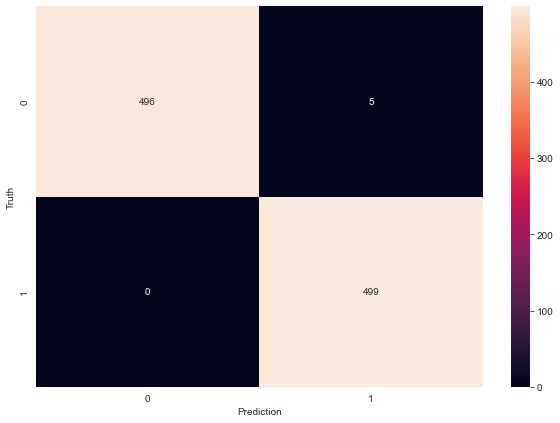

In [120]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [121]:
joblib.dump(model, 'fake_news_classifier')
fake_news_classifier = joblib.load('fake_news_classifier')

In [122]:
news = [' Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referring to the fact that Paul Ryan didn t call to congratulate him after the debate. Probably because he didn t win despite what Trump s ego tells him.Gingrich also added: Donald Trump has one opponent. Her name is Hillary Clinton. Her name is not Paul Ryan. It s not anybody else. Trump doesn t seem to realize that the person he should be mad at is himself because he truly is his own worst enemy. This will ultimately lead to his defeat and he will have no one to blame but himself.Watch here via Politico:Featured Photo by Joe Raedle/Getty Images',
        'U.S. conservative leader optimistic of common ground on healthcare WASHINGTON (Reuters) - Republicans in the U.S. House of Representatives could achieve common ground on a deal to win support for healthcare legislation on Thursday, after President Donald Trump intervened in negotiations, a conservative leader said on Wednesday. “We’re not there yet, but we’re very optimistic that if we work around the clock between now and Noon tomorrow, that we’re going to be able to hopefully find some common ground,” Representative Mark Meadows, chairman of the conservative House Freedom Caucus, told reporters. Meadows’ group has opposed House Republican healthcare legislation up to now and threatened earlier in the day to block its passage in a Thursday vote.  ']

In [123]:
news_preprocessed = [preprocess(text) for text in news]

In [124]:
news_preprocessed

['  Trump Surrogate BRUTALLY Stabs Pathetic video s look republican presidential candidate Donald Trump lose support rank know thing get bad surrogate start turn exactly happen Fox News Newt Gingrich call Trump   pathetic Gingrich know Trump need focus Hillary Clinton remotely want chance defeat Trump hurt feeling Republicans don t support sexual assault woman turn include House Speaker Paul Ryan R WI Trump lash party Gingrich say Fox News Look let Trump admire ve try help s big trump little Trump little Trump frankly pathetic mean s mad get phone trump s refer fact Paul Ryan didn t congratulate debate probably didn t win despite Trump s ego tell Gingrich add Donald Trump opponent Hillary Clinton Paul Ryan s anybody trump doesn t realize person mad truly bad enemy ultimately lead defeat blame watch Politico feature Photo Joe Raedle Getty Images',
 'U.S. conservative leader optimistic common ground healthcare WASHINGTON Reuters Republicans U.S. House Representatives achieve common groun

In [126]:
fake_news_classifier.predict(news_preprocessed)

array([1, 0], dtype=int64)